<a href="https://colab.research.google.com/github/KandhalaKiran/Fake-Real-News-Machine-Learning-Project/blob/main/Fake_Real_News_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Machine Learning April Major Project

# New Section

In [1]:
#1.create data frame
import pandas as pd
df=pd.read_csv("/content/sample_data/fake_or_real_news.csv.zip")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


# New Section

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [3]:
m=df['label'].value_counts()
m

REAL    3171
FAKE    3164
Name: label, dtype: int64

Text(0, 0.5, 'Count')

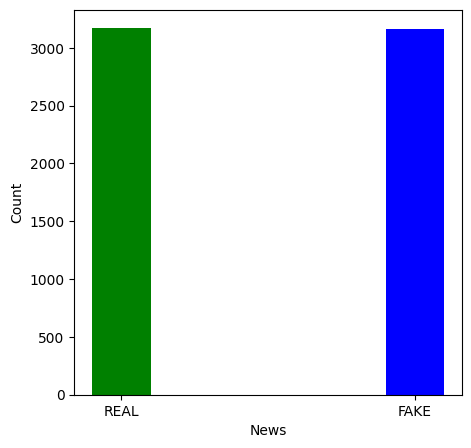

In [5]:
#2. process the data and do visualizations (represent using matplotlib / seaborn the number of real news and fake news)( ex-use a bar graph )
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
count=[3171,3164]
label=['REAL','FAKE']
plt.bar(label,count,color=['green','blue'],width=0.2)
plt.xlabel("News")
plt.ylabel("Count")


In [6]:
#process the data and do visualizations (represent using matplotlib / seaborn the number of real news and fake news)( ex-use a bar graph )
x=df.iloc[:,2].values
y=df.iloc[:,3].values
x

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4751,)
(1584,)
(4751,)
(1584,)


In [9]:
#3.create svc model and count vectorizer separately (method 1)
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [10]:
from sklearn.svm import SVC
model=SVC()

In [11]:
model.fit(x_train_vect,y_train) # x and y for fitting the model

SVC()

In [12]:
y_pred1=model.predict(x_test_vect)
y_pred1 #predicted value

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [13]:
y_test #actual value

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.8642676767676768

In [15]:
#4.(method 2) create a pipeline with Vectorization model and ML algorithm to predict the news as real or fake.
from sklearn.pipeline import make_pipeline
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

y_pred2=model2.predict(x_test)
y_pred2

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [16]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.8383838383838383

In [18]:
#5.create NB model and count vectorizer separately (method 1)
from sklearn.naive_bayes import MultinomialNB
model3=MultinomialNB()

In [19]:
model3.fit(x_train_vect,y_train)


MultinomialNB()

In [20]:
y_pred3=model.predict(x_test_vect)
y_pred3

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [21]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.8642676767676768

In [23]:
#6.(method 2) create a pipeline with Vectorization model and ML algorithm to predict the news as real or fake for the multinomialNB and CountVectorizer
from sklearn.pipeline import make_pipeline
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
y_pred4

array(['REAL', 'REAL', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype='<U4')

In [24]:
y_test

array(['REAL', 'FAKE', 'FAKE', ..., 'REAL', 'FAKE', 'FAKE'], dtype=object)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.8781565656565656

In [26]:
#svc model accuracy        -  0.8642676767676768
#svc pipeline              -  0.8383838383838383
#MultinomialNB model       -  0.8642676767676768
#MultinomialNb pipeline    -  0.8781565656565656

In [27]:
#model persistance (pickle-multilinear regression)
#serialization and deserialization steps

In [28]:
# 7. Use joblib to create and save it as a model (USE THE MODEL WITH THE HIGHEST ACCURACY)(joblib is similar to pickle)
import joblib
joblib.dump(model4,'Fake-Real')

['Fake-Real']

In [29]:
#deserialization
import joblib
text_model= joblib.load('Fake-Real')

In [30]:
# 8. Using the new model created using joblib, predict the output of newly entered piece of news
text_model.predict(["free tickets sold"])

array(['FAKE'], dtype='<U4')

In [31]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19580 sha256=8b4318672d9fc6359ef4a16c5f01baffaa2e1c06dff7ff078b7729bc57cd5bd7
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

In [32]:
#9. Create a streamlit webapp for Fake News detector using the joblib model (pipeline model)
%%writefile app.py
import streamlit as st
import joblib

st.title("FAKE-REAL CLASSIFIER")  # title for the web app
text_model= joblib.load('/content/Fake-Real') # loading the joblib model to use for predicting the output
ip= st.text_input("Enter the message :")    # input message
op= text_model.predict([ip])                # use the model for predicting the output
if st.button('PREDICT'):                    # create a button called as predict, and if that button is clicked, then display the output
  st.title(op[0])# print the output

Writing app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.194.62:8501

npx: installed 22 in 13.532s
your url is: https://few-dots-reply.loca.lt
